In [1]:
import sys, datetime
from qick.asm_v2 import QickSweep1D
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../Libraries") # replace this with your location of the Libraries folder
from filtering import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load Autonics TM4 Driver


  0%|          | 0/300 [00:00<?, ?it/s]

Creating directory G:\My Drive\chatot\data\filtering\2025_04_01\14;04;31\
Data saved to G:\My Drive\chatot\data\filtering\2025_04_01\14;04;31\data.h5
Config saved to G:\My Drive\chatot\data\filtering\2025_04_01\14;04;31\cfg.json


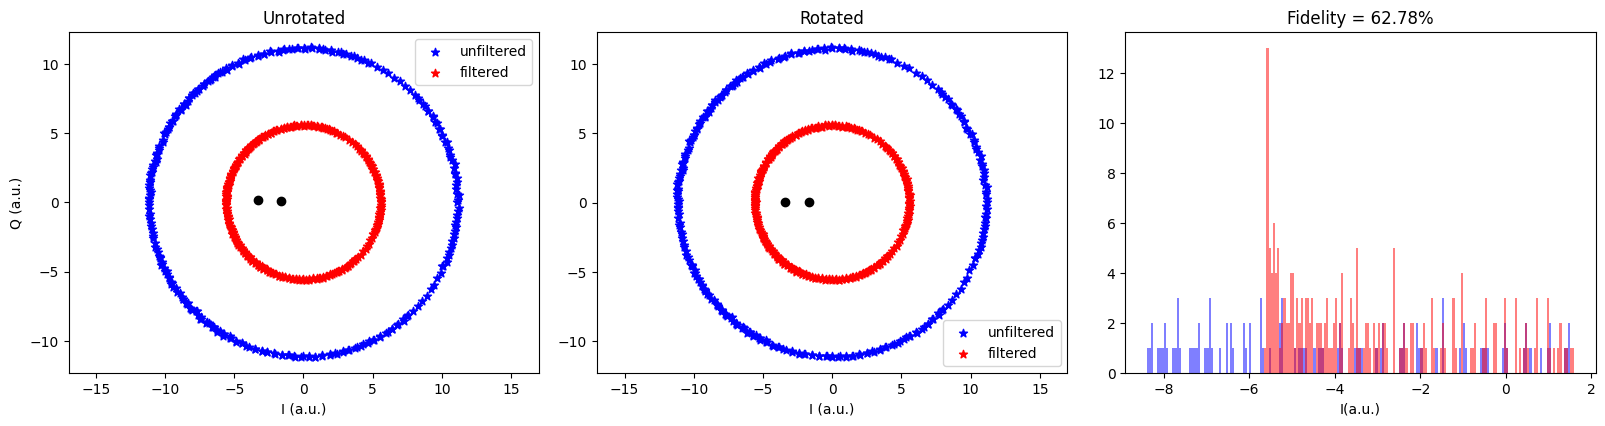

In [2]:
date = str(datetime.datetime.now().strftime('%Y_%m_%d'))
time = str(datetime.datetime.now().strftime('%H;%M;%S'))

datapath = f'G:\\My Drive\\chatot\\data\\filtering\\{date}\\{time}\\' # replace this with your data location

config_file = f"..\\..\\..\\..\\cfg\\llosta.json" # replace this with your config

meas = filtering(path=datapath, config_file=config_file)

def filter(n): # function to be the filter. change to whatever
    return linear_filter(n)

def linear_filter(n):
    return np.linspace(1, 0, n)

def no_filter(n):
    return np.ones(n)

meas.cfg.expt = {
    "n_count": 300,
    "res_freq": 5984.9,
    "res_gain": 0.03,
    "res_pulse_len": 5, 
    "res_phase": 0,
    "trig_offset": 0.45,
    "filter": filter, # what's the best way to do this?
    "relaxation_time": 400
}

data = meas.acquire()
meas.display(save=True)
meas.savedata()

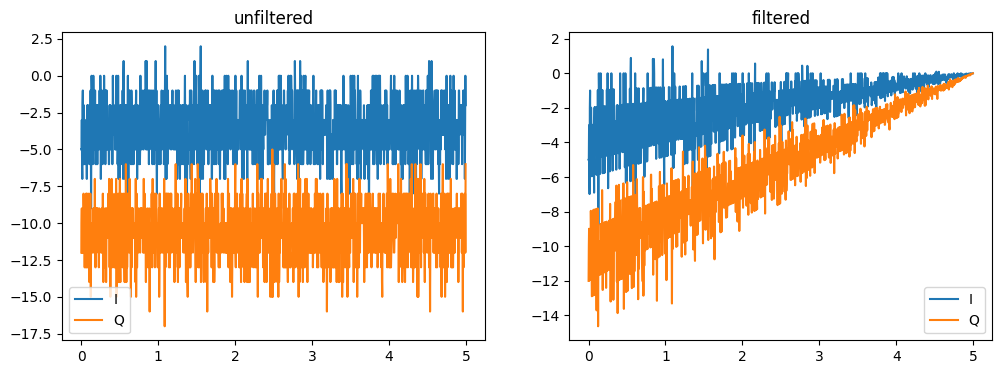

In [3]:
def plot_raw(shot):
    Ig = data['Ig']
    Qg = data['Qg']
    Ie = data['Ie']
    Qe = data['Qe']
    t = data['time']
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(t, Ig[shot], label='I')
    ax[0].plot(t, Qg[shot], label='Q')
    ax[0].legend()
    ax[0].set_title("unfiltered")
    ax[1].plot(t, Ie[shot], label='I')
    ax[1].plot(t, Qe[shot], label='Q')
    ax[1].legend()
    ax[1].set_title("filtered")

plot_raw(50)